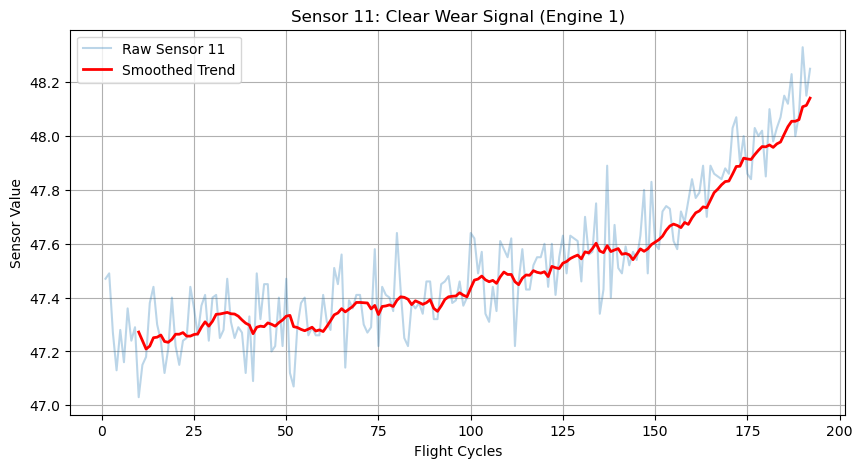

✅ Plot generated! Notice how the red line trends upward as the engine nears failure.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 1. New Path (files are now directly in data folder)
file_path = 'data/train_FD001.txt'

# 2. Define columns
col_names = ['unit_nr', 'cycles', 'os_1', 'os_2', 'os_3'] + ['s_{}'.format(i) for i in range(1, 22)]

# 3. Load the data
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep='\s+', header=None, names=col_names)
    
    # Calculate RUL
    max_cycles = df.groupby('unit_nr')['cycles'].transform('max')
    df['RUL'] = max_cycles - df['cycles']

    # 4. Pick Engine #1 and calculate a "Rolling Average" to smooth the lines
    engine_1 = df[df['unit_nr'] == 1].copy()
    engine_1['s_11_smooth'] = engine_1['s_11'].rolling(window=10).mean()

    # 5. Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(engine_1['cycles'], engine_1['s_11'], alpha=0.3, label='Raw Sensor 11')
    plt.plot(engine_1['cycles'], engine_1['s_11_smooth'], color='red', linewidth=2, label='Smoothed Trend')
    
    plt.title('Sensor 11: Clear Wear Signal (Engine 1)')
    plt.xlabel('Flight Cycles')
    plt.ylabel('Sensor Value')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print("✅ Plot generated! Notice how the red line trends upward as the engine nears failure.")
else:
    print(f"❌ Could not find {file_path}. Please check your data folder again.")